<h1> Exploratory Data Analysis <h1/>

First import the dataset 

In [1]:
dataset <- read.csv("housing.csv")

Now see the structure of the dataset 

In [2]:
str(dataset)

'data.frame':	20640 obs. of  10 variables:
 $ longitude         : num  -122 -122 -122 -122 -122 ...
 $ latitude          : num  37.9 37.9 37.9 37.9 37.9 ...
 $ housing_median_age: num  41 21 52 52 52 52 52 52 42 52 ...
 $ total_rooms       : num  880 7099 1467 1274 1627 ...
 $ total_bedrooms    : num  129 1106 190 235 280 ...
 $ population        : num  322 2401 496 558 565 ...
 $ households        : num  126 1138 177 219 259 ...
 $ median_income     : num  8.33 8.3 7.26 5.64 3.85 ...
 $ median_house_value: num  452600 358500 352100 341300 342200 ...
 $ ocean_proximity   : chr  "NEAR BAY" "NEAR BAY" "NEAR BAY" "NEAR BAY" ...


In this dataset there are **20640** observations and **10** variables.
All the variables are contain numerical data except "ocean_proximity" and it contain Categorical data.
<br /> 
Now check the missing values.

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2021 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



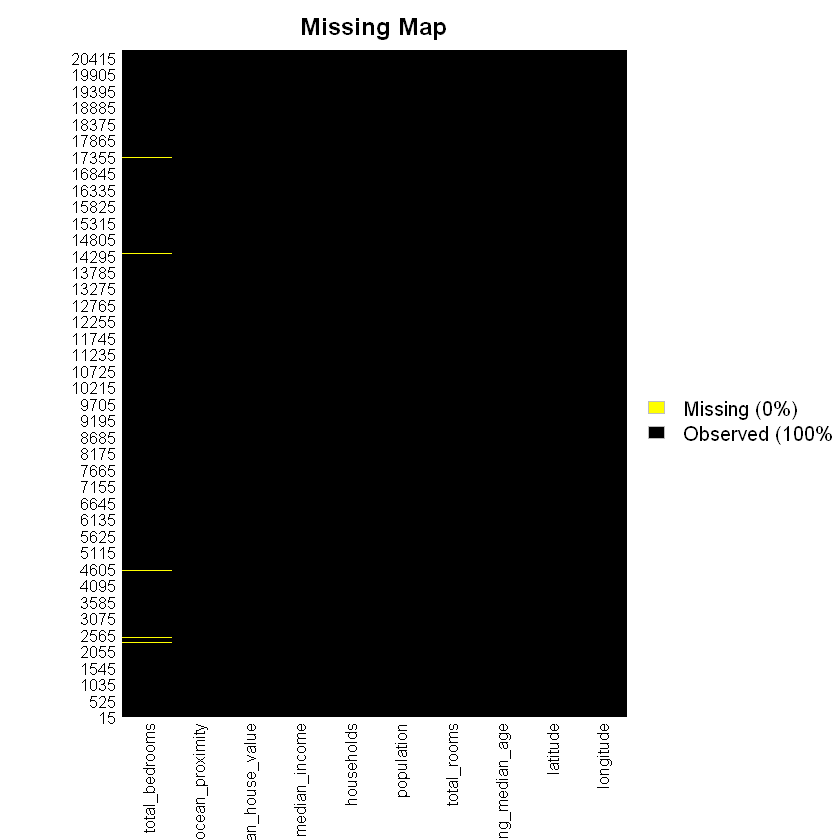

In [3]:
# install.packages('Amelia')
library(Amelia)
# missmap function considers "NA" values as missing values 
# but it does not consider empty values as missing values.So replace empty values as "NA"
dataset[dataset==""]<-NA
missmap(dataset,
        col=c("Yellow","black"),
        main = "Missing Map")

From the Missmap graph we see there are some missing values in **total_bedrooms** column.<br /> 
Now count how many missing values in the total_bedrooms column.

In [4]:
sum(is.na(dataset$total_bedrooms))

[1] 207

There are 207 missing values in total_bedrooms column.<br/>

Lets visualize ocean_proximity variable

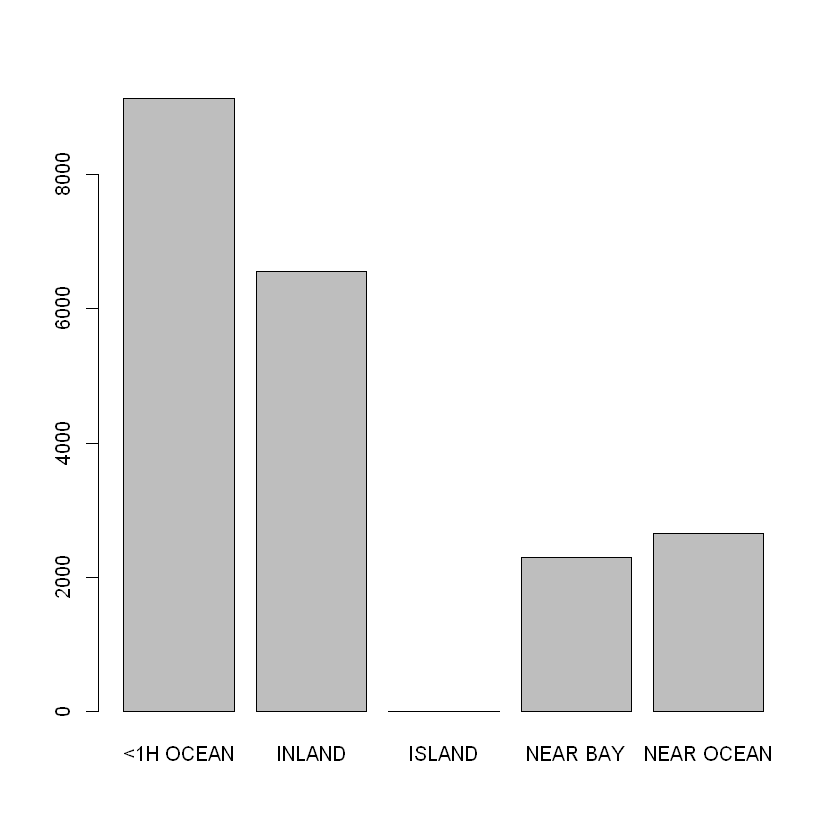

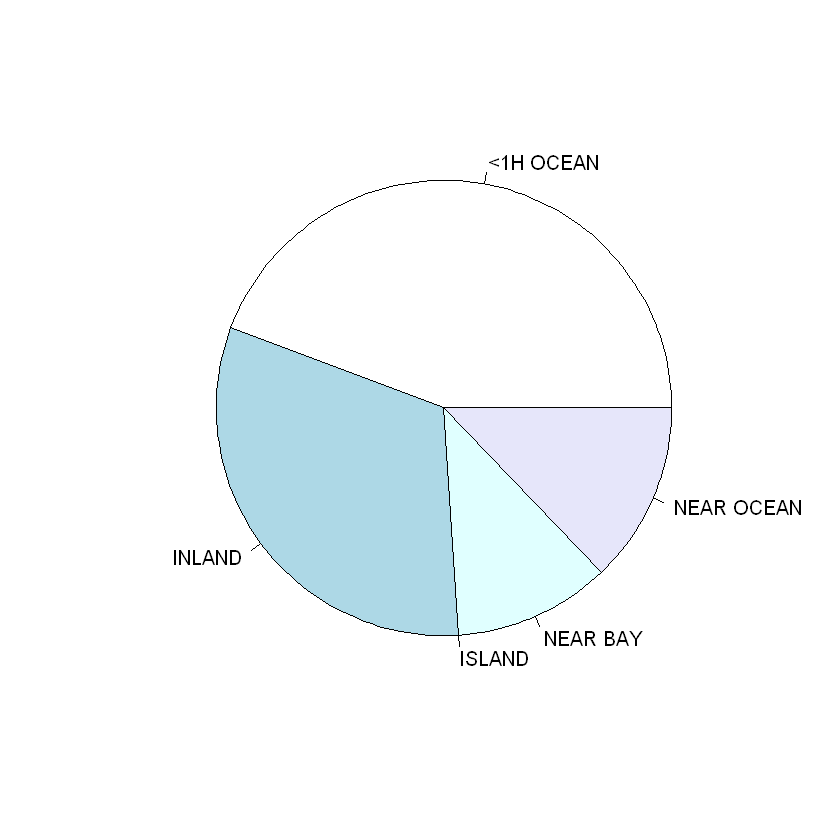

In [5]:
barplot(table(dataset$ocean_proximity))
pie(table(dataset$ocean_proximity))

Frequency Table of ocean_proximity

In [6]:
table(dataset$ocean_proximity)


 <1H OCEAN     INLAND     ISLAND   NEAR BAY NEAR OCEAN 
      9136       6551          5       2290       2658 

Here most of the house is in **<1H OCEAN** <br/>Now Visualize all numerical variable

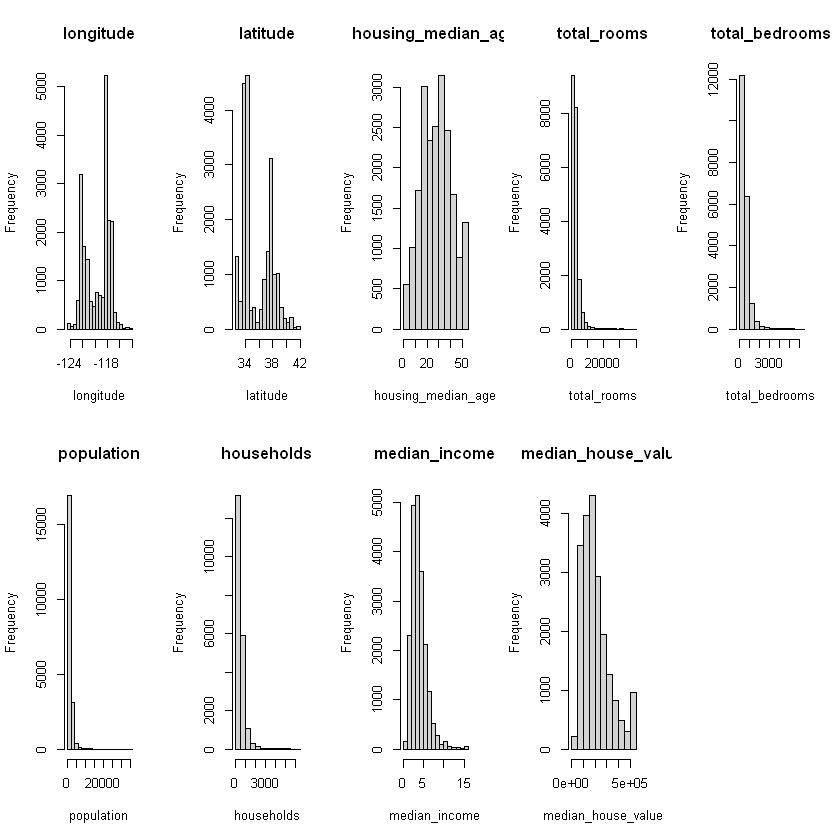

In [7]:
par(mfrow=c(2,5))
header_name <- c("longitude","latitude","housing_median_age","total_rooms","total_bedrooms",
                "population","households","median_income","median_house_value","median_house_value")
i=1
for(i in 1:9){
              hist(dataset[,i],xlab = header_name[i],
               main= paste(header_name[i]))
}

Here most of the variate is **Positively Skewed.** <br/>Let’s look at a summary of each variable:

In [8]:
summary(dataset)

   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.93   1st Qu.:18.00      1st Qu.: 1448  
 Median :-118.5   Median :34.26   Median :29.00      Median : 2127  
 Mean   :-119.6   Mean   :35.63   Mean   :28.64      Mean   : 2636  
 3rd Qu.:-118.0   3rd Qu.:37.71   3rd Qu.:37.00      3rd Qu.: 3148  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
                                                                    
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5634  
 Median : 435.0   Median : 1166   Median : 409.0   Median : 3.5348  
 Mean   : 537.9   Mean   : 1425   Mean   : 499.5   Mean   : 3.8707  
 3rd Qu.: 647.0   3rd Qu.: 1725   3rd Qu.: 605.0   3rd Qu.: 4.7432  
 Max.   :6445.0   Max.   :35682   

Now check outliers by boxplot.

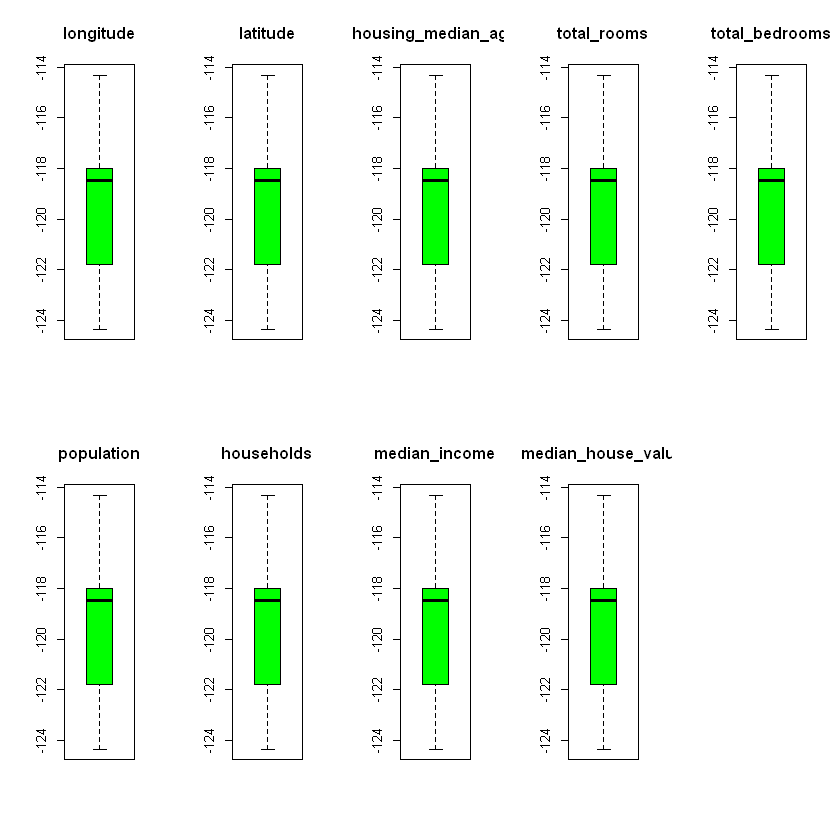

In [9]:
header_name <- c("longitude","latitude","housing_median_age","total_rooms","total_bedrooms",
                 "population","households","median_income","median_house_value","median_house_value")
par(mfrow=c(2,5))
i=1
for(i in 1:9){
  boxplot(dataset[,1],horizontal = F,col=c("green"),
       main= paste(header_name[i]))
}

There is no outlier, We have alredy know that there are 207 missing values in total_bedrooms column.
<br/>  total_bedrooms is posiviely skewed so, replace the missing values with **median**

In [10]:
dataset$total_bedrooms <- ifelse(is.na(dataset$total_bedrooms),
                                 median(dataset$total_bedrooms,na.rm = T),
                                 dataset$total_bedrooms)
summary(dataset$total_bedrooms)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0   297.0   435.0   536.8   643.2  6445.0 

Here there is no missing values,make a pairwise scatter plot to see the relation of variables.

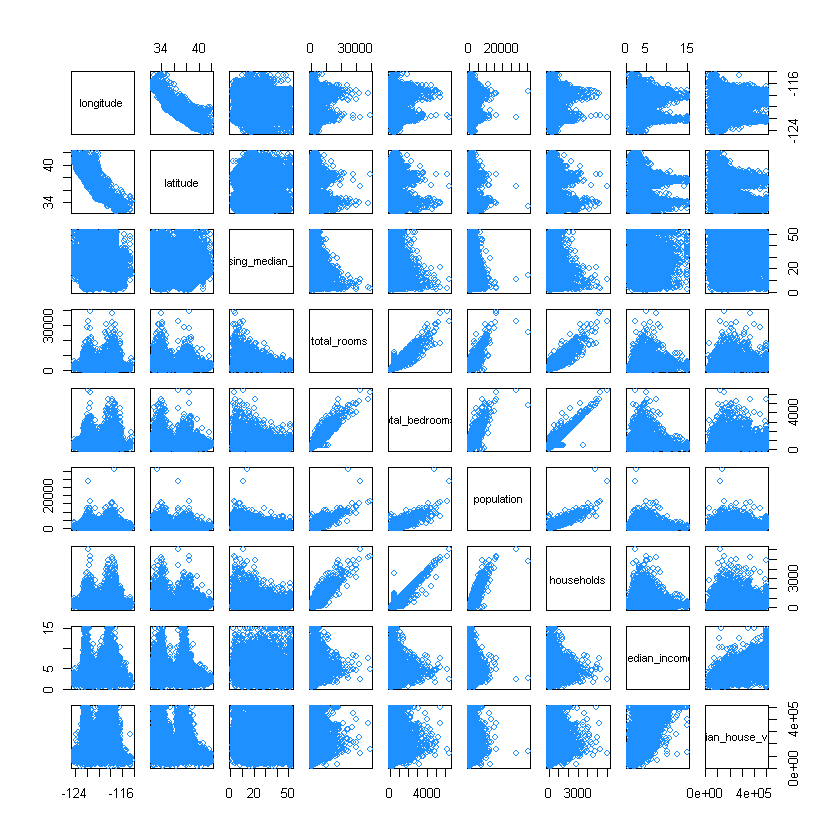

In [11]:
pairs(dataset[,1:9], col = "dodgerblue")

Now make correlation matrix map to see relation of the variables

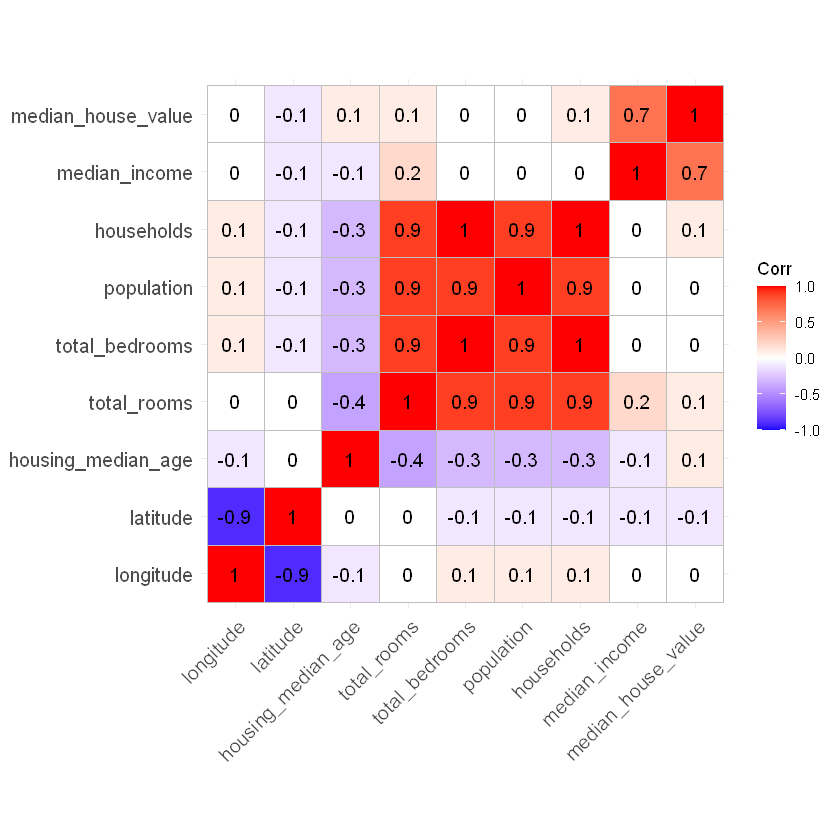

In [12]:
# install.packages("ggcorrplot")
# install.packages("ggplot2")
library(ggplot2)
library(ggcorrplot)
corr<-round(cor(dataset[,1:9]),1)
ggcorrplot(corr,lab = T)

<h1 > Prediction <h1/>

Encoding categorical data into numerical factor

In [13]:
dataset$ocean_proximity <- factor(dataset$ocean_proximity,
                                  levels = c("<1H OCEAN","INLAND","ISLAND","NEAR BAY","NEAR OCEAN"),
                                  labels = c(1,2,3,4,5))

Apply feature scaling

In [14]:
#dataset[,1:9] <- scale(dataset[,1:9])

Now split the dataset into training_set and test_set 

In [15]:
# install.packages("caTools")
library(caTools)
set.seed(123)
split <-sample.split(dataset$median_house_value,SplitRatio = 0.96)
training_set <- subset(dataset, split==T)
test_set <- subset(dataset, split==F)

Fit multiple linear regression.

In [16]:
regressor <- lm(formula = median_house_value~.,data=training_set)
summary(regressor)


Call:
lm(formula = median_house_value ~ ., data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-550869  -42519  -10447   28616  791485 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.232e+06  8.759e+04 -25.482  < 2e-16 ***
longitude          -2.640e+04  1.015e+03 -26.008  < 2e-16 ***
latitude           -2.512e+04  1.001e+03 -25.088  < 2e-16 ***
housing_median_age  1.051e+03  4.380e+01  24.001  < 2e-16 ***
total_rooms        -4.598e+00  7.744e-01  -5.938 2.93e-09 ***
total_bedrooms      6.961e+01  5.941e+00  11.717  < 2e-16 ***
population         -3.912e+01  1.067e+00 -36.648  < 2e-16 ***
households          7.834e+01  6.665e+00  11.754  < 2e-16 ***
median_income       3.881e+04  3.348e+02 115.935  < 2e-16 ***
ocean_proximity2   -3.967e+04  1.740e+03 -22.793  < 2e-16 ***
ocean_proximity3    1.567e+05  3.064e+04   5.115 3.17e-07 ***
ocean_proximity4   -3.742e+03  1.910e+03  -1.960  0.05004 .  
ocean_proximity5    

Make prediction using multiple linear regression

In [17]:
y_pred <- predict(regressor, newdata = test_set)

Now calculate sum of squares of residuals for test data

In [18]:
Rss1 <- sum((y_pred-test_set$median_house_value)^2)
Rss1

[1] 1.988011e+12

Fit Decision tree model

In [19]:
library(rpart)
regressor <- rpart(formula = median_house_value~.,data=training_set,control = rpart.control(minsplit = 20))
regressor

n= 20390 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 20390 2.701376e+14 206740.30  
   2) median_income< 5.03515 16038 1.338678e+14 173371.90  
     4) ocean_proximity=2 5821 1.661886e+13 112021.70  
       8) median_income< 3.03555 3349 5.230864e+12  90706.81 *
       9) median_income>=3.03555 2472 7.805111e+12 140898.70 *
     5) ocean_proximity=1,3,4,5 10217 8.285711e+13 208325.30  
      10) median_income< 3.10635 4400 2.677681e+13 171319.70 *
      11) median_income>=3.10635 5817 4.549726e+13 236316.40  
        22) longitude>=-118.275 2431 1.210349e+13 205839.70 *
        23) longitude< -118.275 3386 2.951465e+13 258197.30 *
   3) median_income>=5.03515 4352 5.260342e+13 329709.90  
     6) median_income< 6.8683 3080 2.717336e+13 291160.60  
      12) ocean_proximity=2 531 3.285049e+12 214860.30 *
      13) ocean_proximity=1,4,5 2549 2.015298e+13 307055.30 *
     7) median_income>=6.8683 1272 9.770312e+12 423052.50 *

Make prediction using decision tree regression

In [20]:
y_pred <- predict(regressor, newdata = test_set)

Now calculate sum of squares of residuals for test data

In [21]:
Rss2 <- sum((y_pred-test_set$median_house_value)^2)
Rss2

[1] 2.182906e+12

Fit Random forest model

In [22]:
library(randomForest)
set.seed(123)
regressor <- randomForest(x=dataset[,-9],y=dataset$median_house_value,ntree=100)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin




Make prediction using random forest regression

In [23]:
y_pred <- predict(regressor, newdata = test_set)

Now calculate sum of squares of residuals for test data

In [24]:
Rss3 <- sum((y_pred-test_set$median_house_value)^2)
Rss3

[1] 187057732850

Compareing three sum of squares of residuals we see Rss3 is less than others.
<br/> 
Random Forest is the best model of these three models for this dataset.

In [25]:
write.csv(y_pred,"California_prediction.csv")